In [1]:

import os
import cv2


In [2]:
loc1 = 'chest_xray/train/PNEUMONIA'
loc2 = 'chest_xray/train/NORMAL'
from tqdm import tqdm
features = []
labels = []
for i in tqdm(os.listdir(loc1)):
    try:
            
        imf = cv2.imread(os.path.join(loc1,i),0)


        imf = cv2.resize(imf, (50, 50))
        features.append(imf)
        labels.append(0)
    except:
        continue
    
for i in tqdm(os.listdir(loc2)):
    try:
            
        imf = cv2.imread(os.path.join(loc2,i),0)


        imf = cv2.resize(imf, (50, 50))
        features.append(imf)
        labels.append(1)
    except:
        continue                
            
               
        
    

100%|██████████████████████████████████████████████████████████████████████████████| 1341/1341 [00:20<00:00, 65.83it/s]


In [3]:
import numpy as np
X = np.array(features)
X.shape

(5216, 50, 50)

In [4]:
import numpy as np
Y = np.array(labels)
Y.shape

(5216,)

In [5]:
Xt = X.reshape(5216,2500)/X.max()
Yt = Y.reshape(5216,1)

In [6]:
Yt


array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [7]:
import keras
from keras.utils import np_utils
Yt = np_utils.to_categorical(Yt)

Using TensorFlow backend.


In [8]:
Yt

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [9]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xt,Yt)

In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers


In [11]:
model = models.Sequential()
model.add(layers.Dense(256 , activation='relu' , input_dim=xtrain.shape[1]))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(128 , activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256 , activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128 , activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(2 , activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               640256    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               3

In [13]:
from keras import optimizers
from keras import metrics


In [14]:
model.compile(optimizer='sgd',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model.fit(xtrain,ytrain,epochs=100,validation_data = (xtest,ytest))

Epoch 1/100
123/123 [==============================] - 1s 5ms/step - loss: 0.0705 - accuracy: 0.9737 - val_loss: 0.2299 - val_accuracy: 0.9256
Epoch 2/100
123/123 [==============================] - 1s 5ms/step - loss: 0.0682 - accuracy: 0.9760 - val_loss: 0.1200 - val_accuracy: 0.9594
Epoch 3/100
123/123 [==============================] - 1s 5ms/step - loss: 0.0628 - accuracy: 0.9762 - val_loss: 0.1323 - val_accuracy: 0.9563
Epoch 4/100
123/123 [==============================] - 1s 7ms/step - loss: 0.0553 - accuracy: 0.9826 - val_loss: 0.1484 - val_accuracy: 0.9578
Epoch 5/100
123/123 [==============================] - 2s 17ms/step - loss: 0.0690 - accuracy: 0.9757 - val_loss: 0.1269 - val_accuracy: 0.9609
Epoch 6/100
123/123 [==============================] - 1s 10ms/step - loss: 0.0591 - accuracy: 0.9796 - val_loss: 0.1061 - val_accuracy: 0.9632
Epoch 7/100
123/123 [==============================] - 1s 11ms/step - loss: 0.0538 - accuracy: 0.9811 - val_loss: 0.1374 - val_accuracy: 0.9

In [22]:
print(model.evaluate(xtrain,ytrain))
print(model.evaluate(xtest,ytest))


123/123 [==============================] - 1s 9ms/step - loss: 0.0235 - accuracy: 0.9923
[0.0235117357224226, 0.9923312664031982]
41/41 [==============================] - 0s 4ms/step - loss: 0.2040 - accuracy: 0.9525
[0.2039908617734909, 0.9524539709091187]


In [23]:

from sklearn.metrics import confusion_matrix
confusion_matrix(np.argmax(ytrain,axis=1),np.argmax(model.predict(xtrain),axis=1))


array([[2915,    4],
       [  26,  967]], dtype=int64)

# validation data

In [24]:
lv1 = 'chest_xray/val/PNEUMONIA'
lv2 = 'chest_xray/val/NORMAL'

val_feature = []
for i in tqdm(os.listdir(lv1)):
    f = cv2.imread(os.path.join(lv1,i),0)
    fr = cv2.resize(f,(50,50))
    val_feature.append(fr)
    
for i in tqdm(os.listdir(lv2)):
    f = cv2.imread(os.path.join(lv2,i),0)
    fr = cv2.resize(f,(50,50))
    val_feature.append(fr)

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 45.46it/s]


In [25]:
Xv = np.array(val_feature)
Xv.shape


(16, 50, 50)

In [26]:
Xv = Xv.reshape(16,2500)/Xv.max()

In [27]:
val_labels = []

for i in tqdm(os.listdir(lv1)):
    val_labels.append(0)
    
for i in tqdm(os.listdir(lv2)):
    val_labels.append(1)

100%|████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<?, ?it/s]


In [28]:
Yv = np.array(val_labels).reshape(-1,1)
Yv = np_utils.to_categorical(Yv)

In [29]:
model.evaluate(Xv,Yv)

1/1 [==============================] - 0s 18ms/step - loss: 1.1578 - accuracy: 0.7500


[1.1577550172805786, 0.75]

In [30]:
chest_xray = 'chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg'
import cv2
im = cv2.imread(chest_xray,0)
im = cv2.resize(im,(50,50))

In [31]:
model.predict([im.reshape(1,2500)])

array([[1., 0.]], dtype=float32)

In [32]:



Prections = np.array(['Pnemonia','Normal'])

print(np.argmax(model.predict([im.reshape(1,2500)])))
print(Prections[np.argmax(model.predict([im.reshape(1,2500)]))])

0
Pnemonia


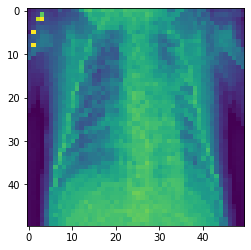

In [33]:
import matplotlib.pyplot as plt
plt.imshow(im)
plt.show()

In [35]:
model.save('xray_neuealnetwork.h5')

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               640256    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               3

In [ ]:
import pickle


In [ ]:
filename = 'xray_randomforest.sav'
pickle.dump(rmodel, open(filename, 'wb'))